# Árvore Balanceada AVL

Adaptação a partir da ABB


In [23]:
class Node:
    def __init__(self, chave):
        self.esquerda = None
        self.direita = None
        self.valor = chave
        self.altura = 1

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

class AVL:
    def __init__(self):
        self.raiz = None

    def inserir(self, chave):
        self.raiz = self._inserir(self.raiz, chave)

    def remover(self, chave):
        self.raiz = self._remover(self.raiz, chave)

    def percurso_em_ordem(self):
        self._percurso_em_ordem(self.raiz)
        print(" ")

    def percurso_pre_ordem(self):
        self._percurso_pre_ordem(self.raiz)
        print(" ")
    
    def percurso_pos_ordem(self):
        self._percurso_pos_ordem(self.raiz)
        print(" ")

    def buscar(self, chave):
        return self._buscar(self.raiz, chave, 0)

    def _inserir(self, raiz, chave):
        if raiz is None:
            return Node(chave)
        else:
            if raiz.valor < chave:
                raiz.direita = self._inserir(raiz.direita, chave)
            else:
                raiz.esquerda = self._inserir(raiz.esquerda, chave)

        # Particularidades da inserção na AVL

        raiz.altura = 1 + max(self._altura(raiz.esquerda), self._altura(raiz.direita))
        balanceamento = self._fator_balanceamento(raiz)

        # Caso LL (esquerda-esquerda)
        if balanceamento > 1 and chave < raiz.esquerda.valor:
            return self._rotacao_direita(raiz)
        
        # Caso RR (direita-direita)
        if balanceamento < -1 and chave > raiz.direita.valor:
            return self._rotacao_esquerda(raiz)

        # Caso LR (esquerda-direita)
        if balanceamento > 1 and chave > raiz.esquerda.valor:
            raiz.esquerda = self._rotacao_esquerda(raiz.esquerda)
            return self._rotacao_direita(raiz)
     
        # Caso RL (direita-esquerda)
        if balanceamento < -1 and chave < raiz.direita.valor:
            raiz.direita = self._rotacao_direita(raiz.direita)
            return self._rotacao_esquerda(raiz)

        return raiz

    def _remover(self, raiz, chave):
        if raiz is None:
            return raiz
        
        # Localização do elemento a ser excluído
        if chave < raiz.valor:
            raiz.esquerda = self._remover(raiz.esquerda, chave)
        elif chave > raiz.valor:
            raiz.direita = self._remover(raiz.direita, chave)
        else: 
            if raiz.esquerda is None:
                temp = raiz.direita
                raiz = None
                return temp
            if raiz.direita is None:
                temp = raiz.esquerda
                raiz = None
                return temp
            temp = self.node_valor_minimo(raiz.direita)
            raiz.valor = temp.valor
            raiz.direita = self._remover(raiz.direita, temp.valor)
        
        # return raiz

        if raiz is None:
            return raiz

        # Atualização da altura do nó atual
        raiz.altura = 1 + max(self._altura(raiz.esquerda), self._altura(raiz.direita))

        # Calcular o fator de balanceamento para verificar se o nó se tornou desbalanceado
        balanceamento = self._fator_balanceamento(raiz)

        # Se o nó está desbalanceado, então será balanceado a árvore
        # Caso LL (esquerda-esquerda)
        if balanceamento > 1 and self._fator_balanceamento(raiz.esquerda) >= 0:
            return self._rotacao_direita(raiz)

        # Caso LR (esquerda-direita)
        if balanceamento > 1 and self._fator_balanceamento(raiz.esquerda) < 0:
            raiz.esquerda = self._rotacao_esquerda(raiz.esquerda)
            return self._rotacao_direita(raiz)

        # Caso RR (direita-direita)
        if balanceamento < -1 and self._fator_balanceamento(raiz.direita) <= 0:
            return self._rotacao_esquerda(raiz)

        # Caso RL (direita-esquerda)
        if balanceamento < -1 and self._fator_balanceamento(raiz.direita) > 0:
            raiz.direita = self._rotacao_direita(raiz.direita)
            return self._rotacao_esquerda(raiz)

        return raiz

    def node_valor_minimo(self, nodo):
        atual = nodo
        while atual.esquerda is not None:
            atual = atual.esquerda
        return atual

    def _percurso_em_ordem(self, raiz):
        if raiz:
            self._percurso_em_ordem(raiz.esquerda)
            print(raiz.valor, end=' ')
            self._percurso_em_ordem(raiz.direita)
    
    def _percurso_pre_ordem(self, raiz):
        if raiz:
            print(raiz.valor, end=' ')
            self._percurso_em_ordem(raiz.esquerda)
            self._percurso_em_ordem(raiz.direita)

    def _percurso_pos_ordem(self, raiz):
        if raiz:
            self._percurso_em_ordem(raiz.esquerda)
            self._percurso_em_ordem(raiz.direita)
            print(raiz.valor, end=' ')

    def _buscar(self, raiz, chave, passos):
        if raiz is None:
            return (False, passos)
        
        if raiz.valor == chave:
            return (True, passos + 1)
        elif raiz.valor < chave:
            return self._buscar(raiz.direita, chave, passos + 1)
        else: 
            return self._buscar(raiz.esquerda, chave, passos + 1)

    def exibir_arvore(self):
        if not self.raiz:
            print("Árvore está vazia")
            return
        G = nx.DiGraph()
        posicoes = {}

        def adicionar_nos_arestas(node, posicao=0, nivel=0, largura=1.0):
            if node is not None:
                posicoes[node.valor] = (posicao, -nivel)
                if node.esquerda:
                    G.add_edge(node.valor, node.esquerda.valor)
                    adicionar_nos_arestas(node.esquerda, posicao - largura / 2 ** (nivel + 1), nivel + 1, largura)
                if node.direita:
                    G.add_edge(node.valor, node.direita.valor)
                    adicionar_nos_arestas(node.direita, posicao + largura / 2 ** (nivel + 1), nivel + 1, largura)
                
                if node.esquerda is None and node.direita is None:
                    G.add_node(node.valor)

        adicionar_nos_arestas(self.raiz)
        nx.draw(G, posicoes, 
                with_labels=True, 
                arrows=False, 
                node_size=3000, 
                node_color="skyblue", 
                font_size=15, 
                font_weight="bold")
        plt.show()

    # Particularidades da árvore AVL

    def _altura(self, nodo):
        if not nodo:
            return 0
        return nodo.altura
    
    def _fator_balanceamento(self, nodo):
        if not nodo:
            return 0
        return self._altura(nodo.esquerda) - self._altura(nodo.direita)
    
    def _rotacao_direita(self, y):
        x = y.esquerda
        T2 = x.direita 
        x.direita = y
        y.esquerda = T2
        y.altura = 1 + max(self._altura(y.esquerda), self._altura(y.direita))
        x.altura = 1 + max(self._altura(x.esquerda), self._altura(x.direita))
        return x

    def _rotacao_esquerda(self, x):
        y = x.direita
        T2 = y.esquerda
        y.esquerda = x
        x.direita = T2
        x.altura = 1 + max(self._altura(x.esquerda), self._altura(x.direita))
        y.altura = 1 + max(self._altura(y.esquerda), self._altura(y.direita))
        return y


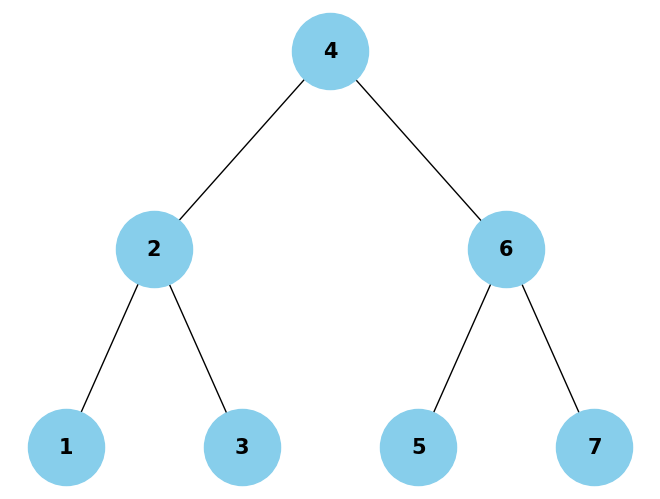

In [71]:
avl = AVL()

avl.inserir(1)
avl.inserir(2)
avl.inserir(3)
avl.inserir(4)
avl.inserir(5)
avl.inserir(6)
avl.inserir(7)

avl.remover(6)
avl.remover(7)
avl.remover(5)
avl.inserir(5)
avl.inserir(6)
avl.inserir(7)
avl.exibir_arvore()

# 1 2 3
# 3 2 1
# 3 1 2
# 1 3 2